In [38]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [40]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [41]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [42]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [43]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model=RandomForestClassifier()

In [46]:
model.fit(x_train2,y_train)

C:\Users\ratho\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [47]:
y_pred=model.predict(x_test2)
y_pred

array([2, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [48]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1041
           1       0.55      0.51      0.53      1071
           2       0.33      0.35      0.34       940
           3       0.28      0.34      0.31       820
           4       0.38      0.39      0.38       969
           5       0.39      0.42      0.41       917
           6       0.55      0.46      0.50      1205
           7       0.44      0.51      0.48       861
           8       0.60      0.59      0.59      1034
           9       0.55      0.48      0.51      1142

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.47      0.46      0.47     10000



In [49]:
confusion_matrix(y_pred,y_test)

array([[570,  33, 111,  50,  57,  34,  12,  44,  90,  40],
       [ 38, 545,  44,  48,  22,  25,  30,  49,  95, 175],
       [ 72,  14, 333,  78, 170,  85,  92,  56,  19,  21],
       [ 19,  39,  84, 281,  60, 160,  73,  55,  22,  27],
       [ 23,  21, 134,  76, 379,  76, 116, 106,  21,  17],
       [ 20,  32,  63, 175,  51, 389,  47,  79,  36,  25],
       [ 19,  40, 121, 145, 146,  91, 553,  52,  14,  24],
       [ 22,  25,  57,  57,  76,  87,  30, 443,  22,  42],
       [161,  60,  25,  23,  21,  24,  10,  25, 605,  80],
       [ 56, 191,  28,  67,  18,  29,  37,  91,  76, 549]], dtype=int64)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier(n_neighbors=7)

In [52]:
knn.fit(x_train2,y_train)

C:\Users\ratho\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [53]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

C:\Users\ratho\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ratho\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Karan\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Karan\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Karan\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.C

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [54]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [55]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]], dtype=int64)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 1, 9, ..., 2, 3, 1], dtype=uint8)

In [60]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      1029
           1       0.28      0.29      0.28       966
           2       0.23      0.22      0.23      1073
           3       0.17      0.17      0.17       996
           4       0.23      0.22      0.22      1021
           5       0.19      0.20      0.19       959
           6       0.27      0.27      0.27       991
           7       0.27      0.27      0.27       977
           8       0.38      0.37      0.38      1036
           9       0.28      0.29      0.28       952

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000



In [61]:
confusion_matrix(y_pred_dtc,y_test)

array([[342,  71,  87,  71,  56,  56,  41,  75, 148,  82],
       [ 77, 280,  43,  65,  41,  56,  42,  80, 112, 170],
       [ 88,  60, 235, 118, 154, 111, 124,  84,  40,  59],
       [ 59,  71,  96, 171,  99, 165, 124,  95,  46,  70],
       [ 57,  67, 136, 115, 226,  91, 145, 101,  39,  44],
       [ 61,  59, 106, 134, 105, 188,  93,  96,  50,  67],
       [ 33,  61, 117, 128, 130, 103, 265,  71,  30,  53],
       [ 60,  59,  86,  99, 100, 109,  74, 267,  49,  74],
       [149, 118,  43,  47,  37,  62,  38,  55, 384, 103],
       [ 74, 154,  51,  52,  52,  59,  54,  76, 102, 278]], dtype=int64)

In [63]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [64]:
nb.fit(x_train2,y_train)

C:\Users\ratho\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [65]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [66]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



In [67]:
confusion_matrix(y_pred_nb,y_test)

array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]], dtype=int64)

In [68]:
#Custom Image path
img_path='/content/bird.jfif'

In [ ]:
img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(32,32))

In [ ]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [71]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
ans=model.predict(img_arr2)
print(classes[ans[0]])

Using Deep Learning

In [76]:
from tensorflow import keras
from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from matplotlib import pyplot
from keras import datasets

from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [77]:
#import data
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

In [78]:
print("Training Images Shape (x train shape) :", train_images.shape)
print("Label of training images (y train shape) :",train_labels.shape)
print("Test Images Shape (x test shape) :",test_images.shape)
print("Label of test images (y test shape) :",test_labels.shape)

Training Images Shape (x train shape) : (50000, 32, 32, 3)
Label of training images (y train shape) : (50000, 1)
Test Images Shape (x test shape) : (10000, 32, 32, 3)
Label of test images (y test shape) : (10000, 1)


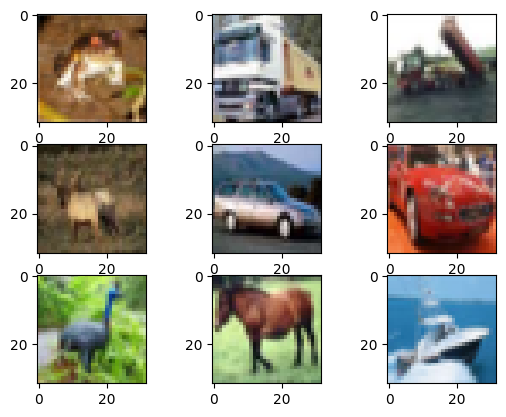

In [79]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[i])
# show the figure
pyplot.show()

In [80]:
train_images, test_images = train_images / 255, test_images / 255

In [81]:
from keras.applications.mobilenet_v2 import MobileNetV2
IMG_SHAPE = (32, 32, 3)
# Pre-trained model with MobileNetV2
base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
# Freeze the pre-trained model weights
base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable =  False
  
  

# Trainable classification head
maxpool_layer = GlobalMaxPooling2D()
prediction_layer = Dense(units=10, activation='softmax')
# Layer classification head with feature detector
model = Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])
num_epochs = 10
fine_tune_epochs = 30
total_epochs =  num_epochs + fine_tune_epochs

C:\Users\ratho\AppData\Local\Temp\ipykernel_3936\766876915.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [82]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [83]:
#Fit the model
hist= model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - loss: 1.7695 - sparse_categorical_accuracy: 0.4354
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - loss: 1.2693 - sparse_categorical_accuracy: 0.5876
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - loss: 1.2889 - sparse_categorical_accuracy: 0.5848
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - loss: 1.1884 - sparse_categorical_accuracy: 0.6088
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - loss: 1.0694 - sparse_categorical_accuracy: 0.6511
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - loss: 1.1075 - sparse_categorical_accuracy: 0.6467
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - loss: 1.0555 - sparse_categorical_accuracy: 0.6623
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - loss: 1.0308 - sparse_categorical_accuracy: 0.6685
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - loss: 0.9999 - sparse_categorical_accuracy: 0.6765
Epoch 10/2

In [84]:
prediction = model.predict(test_images)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step


array([[5.1034876e-05, 1.4498153e-02, 1.7136503e-04, ..., 2.4549197e-04,
        6.0101197e-04, 1.5537908e-03],
       [5.1525545e-01, 1.4230946e-01, 2.2392077e-09, ..., 5.2128630e-09,
        3.3854049e-01, 3.8945689e-03],
       [1.3112146e-01, 3.7060601e-03, 9.9957327e-04, ..., 6.8704225e-02,
        7.3837268e-01, 1.1644316e-02],
       ...,
       [7.7281618e-07, 2.6510066e-10, 3.4099343e-05, ..., 2.5491442e-03,
        5.0806417e-09, 7.9832347e-07],
       [5.2006549e-01, 3.5020033e-01, 1.2850850e-03, ..., 1.5415315e-03,
        1.2763294e-04, 1.8969513e-02],
       [1.7424500e-05, 1.5543408e-05, 5.9365352e-06, ..., 9.9623507e-01,
        3.9101508e-07, 5.9874906e-06]], dtype=float32)

In [85]:
prediction.shape

(10000, 10)

In [86]:
history_dict = hist.history
print(history_dict.keys())

dict_keys(['loss', 'sparse_categorical_accuracy'])


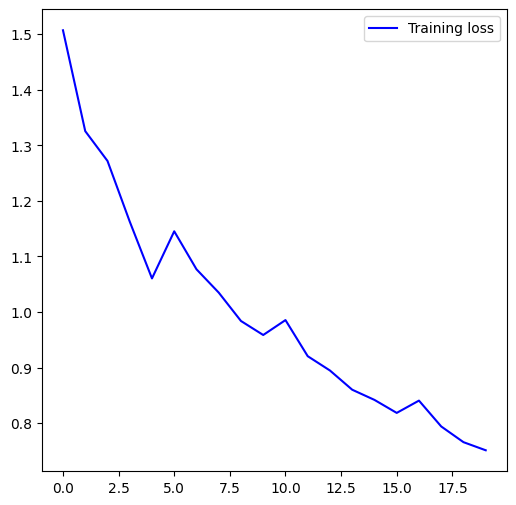

<Figure size 640x480 with 0 Axes>

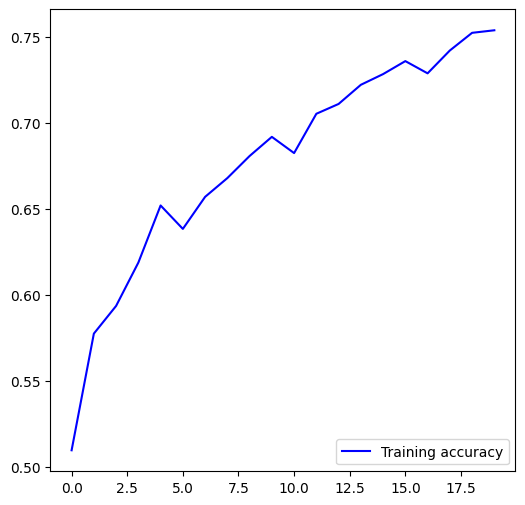

In [87]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['sparse_categorical_accuracy'], color='b', label="Training accuracy")
plt.legend(loc = "lower right")
plt.show()